<a href="https://colab.research.google.com/github/antoniovitorio/Projetos/blob/master/IMPRESSORA_RELATORIO_ss(adm).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import io

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import csv

In [ ]:
pd.read_excel("/content/sample_data/ADM_IMPRESSOARA.xlsx")

In [ ]:
DF = pd.read_excel("/content/sample_data/ADM_IMPRESSOARA.xlsx")
DF.head()

In [ ]:
DF.rename (columns= {"User Name": "Usuario",
                        "Type": "Processo",
                       "Print Pages": "Total de Paginas",
                       "Time": "Hora",
                       "Date": "Data",
                       "Job Name": "Nome do Arquivo"	},inplace = True)

In [ ]:
DF.head()

## ***AQUI COMEÇA TOTAL DE PAGINAS POR USUARIO***

In [ ]:
# DADOS USUARIOS 
DF [["Usuario","Processo","Total de Paginas","Data","Hora"]]

In [ ]:
DF [["Usuario","Processo","Total de Paginas"]]

In [ ]:
dados_grupos = DF [["Usuario","Processo","Total de Paginas"]]
dados_grupos

In [ ]:
plan_agrupada=dados_grupos.groupby(["Usuario","Processo"]).sum()
plan_agrupada

In [ ]:

dados_user=dados_grupos.groupby(["Usuario"]).sum()
dados_user

In [ ]:
#DADOS DOS USUARIOS (TOTAL DE PAGINAS)
Total_por_User = dados_user.sort_values(by='Total de Paginas')
Total_por_User

In [ ]:
# GRAFICO DADOS USUARIOS(TOTAL DE PAGINAS POR USUARIO)
Total_por_User[["Total de Paginas"]].plot(figsize=(15,8), kind = 'bar')
plt.title("IMPRESSORA SS", y=1.08, fontsize='20')
plt.xticks(rotation=45)
plt.draw()

In [ ]:
# GRAFICO DADOS USUARIOS
dados= dados_org.plot(kind='pie',
                      wedgeprops = {"ec": "k"},
                      figsize=(17,8),
                      labeldistance = 1.04,
                      subplots=True,
                      autopct='%1.1f%%',
                      textprops = {"fontsize": 13})
plt.axis('equal')
plt.legend(title='Usuarios',loc=3)
plt.tight_layout()
plt.title("GRÁFICO 02", y=5.08, fontsize='20')
plt.draw()

## ***AQUI COMEÇA ARQUIVO MAIS IMPRESSO***

In [ ]:
DF.head()

In [ ]:
DT_PG= DF [["Usuario","Processo","Nome do Arquivo","Total de Paginas"]]
DT_PG

In [ ]:
DT_PG[["Processo","Nome do Arquivo","Total de Paginas"]]

In [ ]:
Num_pagina=DT_PG[["Processo","Nome do Arquivo","Total de Paginas"]]
Num_pagina

In [ ]:
numeropag = Num_pagina[["Nome do Arquivo","Total de Paginas"]]
numeropag.head()

In [ ]:
total_paginas = numeropag.groupby(["Nome do Arquivo"]).sum()
total_paginas

In [ ]:
#arquivo que foi mais impresso
TOT_PAGINAS = total_paginas.sort_values(by="Total de Paginas",ascending=False)[0:10]
TOT_PAGINAS

In [ ]:
# DADOS NOME DO AQRUIVO
TOT_PAGINAS[["Total de Paginas"]].plot(figsize=(15,8), kind = 'barh',color="firebrick")
plt.title("IMPRESSÃO DE ARQUIVO", y=1.08, fontsize='20')
plt.yticks(rotation=45)
plt.draw()

# ***AQUI COMEÇA POR DIA OU MES!***

In [ ]:
DF.head()

In [ ]:
DF [["Usuario","Processo","Total de Paginas","Data"]]

In [ ]:
CONTG_POR_DIA = DF [["Usuario","Total de Paginas","Data"]]
CONTG_POR_DIA

In [ ]:
#QUANTIDADE POR DIA
CONT_ORGAN = CONTG_POR_DIA.groupby(['Data']).sum()
CONT_ORGAN

In [ ]:
#QUANTIDADE POR DIA
Relatorio_por_dia = CONTG_POR_DIA.groupby([DF['Data'].dt.day, 'Usuario']).sum()
Relatorio_por_dia

In [ ]:
#QUANTIDADE POR MES USUARIO
Relatorio_por_MES = CONTG_POR_DIA.groupby([DF['Data'].dt.month, 'Usuario']).sum()
Relatorio_por_MES

In [ ]:
#TOTAL MES
total_por_MES = CONTG_POR_DIA.groupby([DF['Data'].dt.month]).sum()
total_por_MES

In [ ]:
#Grafico QUANTIDADE POR DIA
CONT_ORGAN[["Total de Paginas"]].plot(figsize=(15,8), kind = 'bar')
plt.title("IMPRESSÃO POR USUÁRIO", y=1.08, fontsize='20')
plt.xticks(rotation=45)
plt.draw()

In [ ]:
#Grafico MES USUARIO
Relatorio_por_MES[["Total de Paginas"]].plot(figsize=(15,8), kind = 'bar')
plt.title("IMPRESSÃO POR USUÁRIO", y=1.08, fontsize='20')
plt.xticks(rotation=45)
plt.draw()

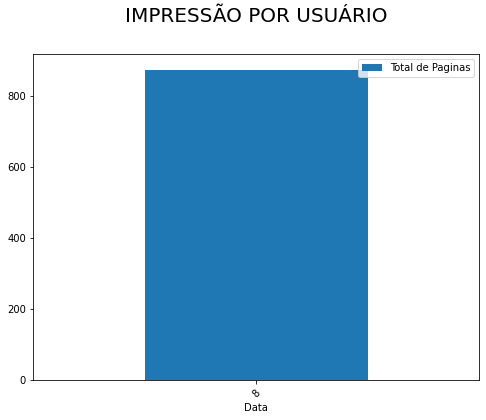

In [176]:
#Grafico TOTAL MES
total_por_MES[["Total de Paginas"]].plot(figsize=(8,6), kind = 'bar')
plt.title("IMPRESSÃO POR USUÁRIO", y=1.08, fontsize='20')
plt.xticks(rotation=45)
plt.draw()